<a href="https://colab.research.google.com/github/krixhnaprasad/Plant-Disease-Classification-Using-Deep-Learning/blob/main/Plant-disease-detection-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Necessary libraries**

* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural Netwrok models such as Sequential.
* We are going to use transfer learning technique.

In [ ]:
import keras
import numpy as np
from keras import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Model
from keras import applications
from keras import backend as k
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

#**Loading the Training and Testing Data and Defining the Basic Parameters**
* We are resizing the input image to 128 * 128

* In the dataset :
    Training Set : 70%
    Validation Set : 20%
    Test Set : 10%

In [ ]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/train/',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/val/',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/test/',
        target_size=(128, 128),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 3002 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 546 images belonging to 4 classes.


# **Visualization of Few Images**

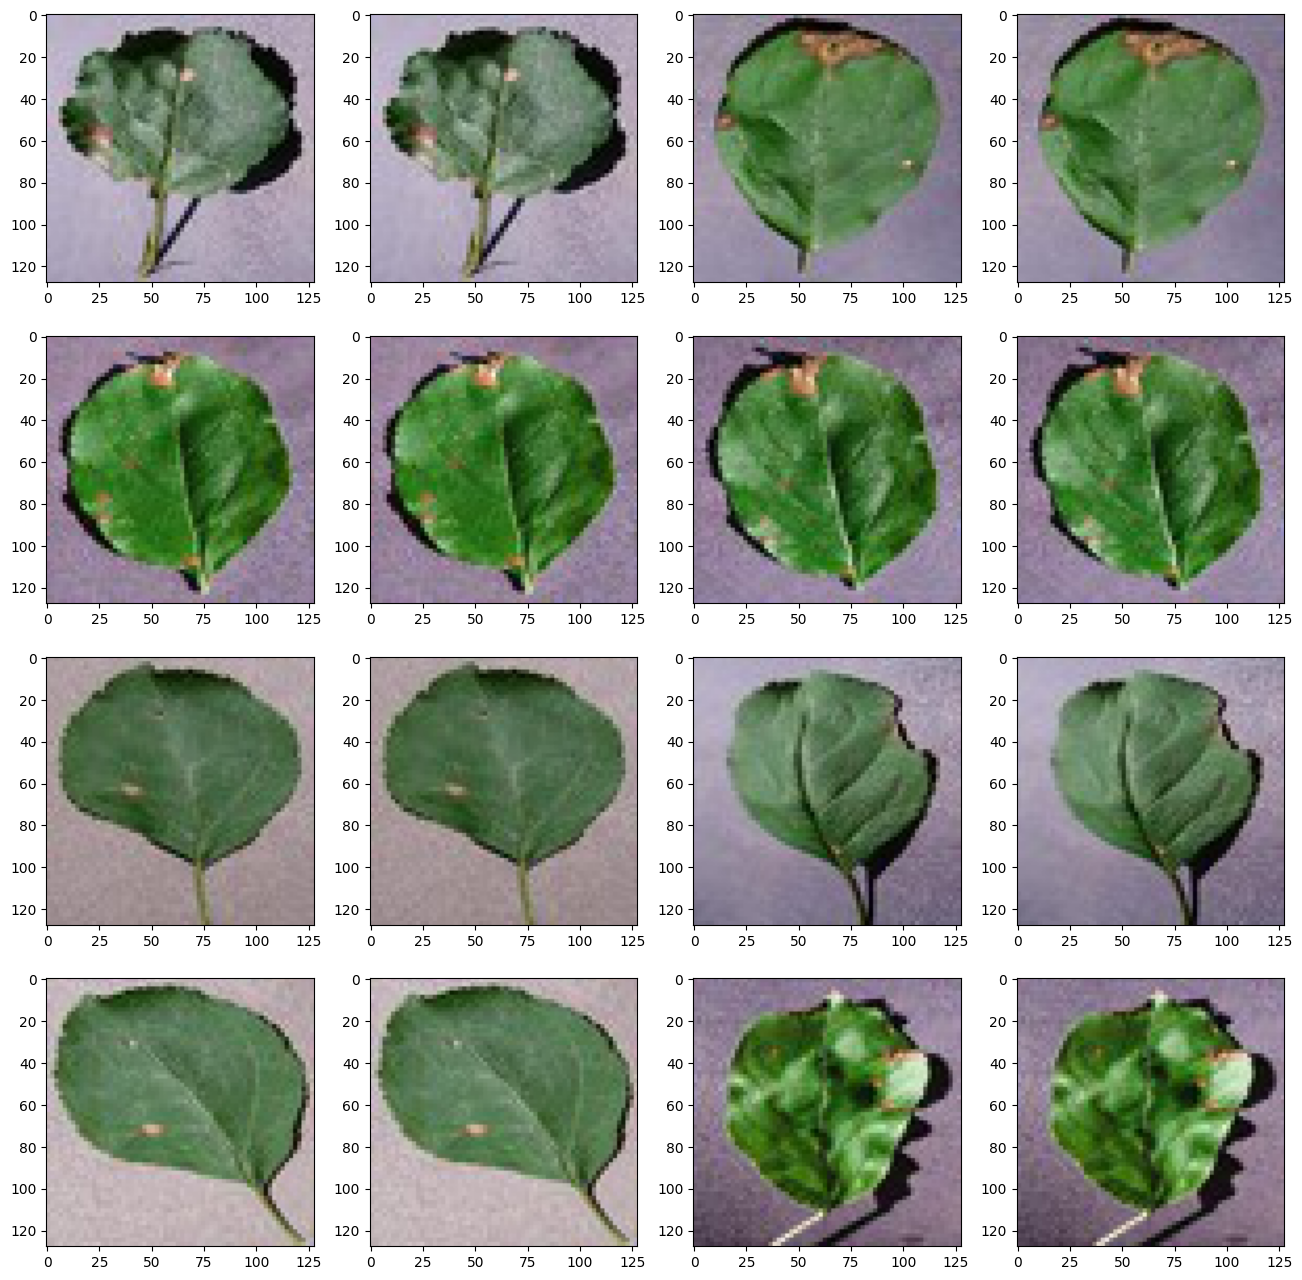

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  # print(img.shape)
  # print(label)
  plt.imshow(img[0])
plt.show()

In [ ]:
img, label = test_generator.next()
img[0].shape

(128, 128, 3)

#**What is ImageNet?**
ImageNet is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories for the purpose of computer vision research.

However, when we hear the term “ImageNet” in the context of deep learning and Convolutional Neural Networks, we are likely referring to the ImageNet Large Scale Visual Recognition Challenge, or ILSVRC for short.

The goal of this image classification challenge is to train a model that can correctly classify an input image into 1,000 separate object categories.

Models are trained on ~1.2 million training images with another 50,000 images for validation and 100,000 images for testing.

# **Exploring Keras Applications for Transfer Learning**

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (128, 128, 3)) # Include_top = False means excluding the model fully connected layers
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

# **Adding top layers according to number of classes in our data**

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
# dense_layer_1 = layers.Dense(63, activation='relu')
# dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


# **Training**

In [ ]:
# sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
187/187 [==============================] - 12s 54ms/step - loss: 0.9706 - acc: 0.6279 - val_loss: 0.7117 - val_acc: 0.7622
Epoch 2/30
187/187 [==============================] - 9s 48ms/step - loss: 0.6395 - acc: 0.8171 - val_loss: 0.5237 - val_acc: 0.8551
Epoch 3/30
187/187 [==============================] - 8s 42ms/step - loss: 0.4930 - acc: 0.8654 - val_loss: 0.4284 - val_acc: 0.9102
Epoch 4/30
187/187 [==============================] - 8s 45ms/step - loss: 0.4115 - acc: 0.8937 - val_loss: 0.3621 - val_acc: 0.9102
Epoch 5/30
187/187 [==============================] - 8s 44ms/step - loss: 0.3582 - acc: 0.9081 - val_loss: 0.3237 - val_acc: 0.9307
Epoch 6/30
187/187 [==============================] - 8s 42ms/step - loss: 0.3221 - acc: 0.9164 - val_loss: 0.2909 - val_acc: 0.9370
Epoch 7/30
187/187 [==============================] - 8s 44ms/step - loss: 0.2943 - acc: 0.9204 - val_loss: 0.2699 - val_acc: 0.9276
Epoch 8/30
187/187 [==============================] - 8s 45ms/step -

# **Saving the model**

In [ ]:
model.save("VGG16_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


# **Loading the model**

In [ ]:
model = models.load_model('VGG16_plant_deseas.h5')
print("Model is loaded")

Model is loaded


# **Saving the Weights**

In [ ]:
model.save_weights('cnn_classification.h5')

# **Loading the weights**

In [ ]:
model.load_weights('cnn_classification.h5')

# **Visualization of training over epoch**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

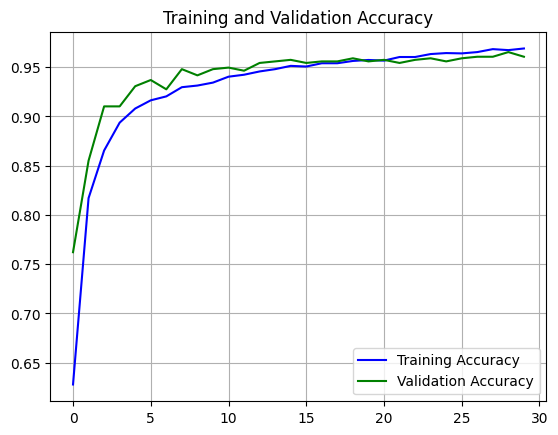

<Figure size 640x480 with 0 Axes>

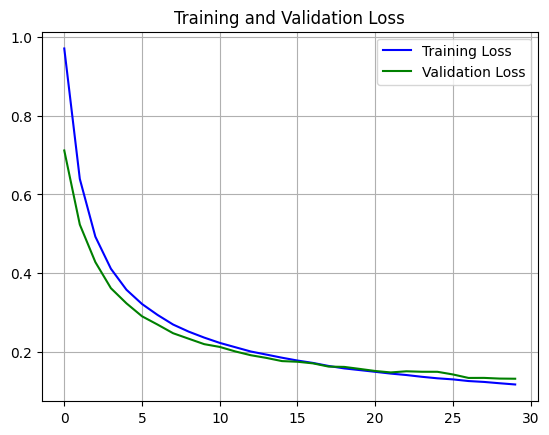

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

# **Performance measure**

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


<ipython-input-20-1bdf1cd647ce>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


546/546 [==============================] - 3s 5ms/step
No of errors = 34/546


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

93.77289377289377

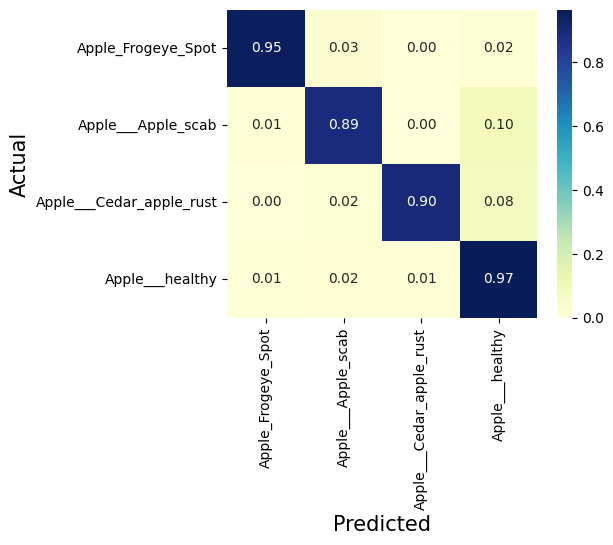

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.96      0.95      0.96       103
      Apple___Apple_scab       0.94      0.89      0.91       134
Apple___Cedar_apple_rust       0.94      0.90      0.92        49
         Apple___healthy       0.93      0.97      0.95       260

                accuracy                           0.94       546
               macro avg       0.94      0.93      0.93       546
            weighted avg       0.94      0.94      0.94       546



# **InceptionNet**

In [ ]:
from keras import applications

## Loading InceptionV3 model
base_model = applications.InceptionV3(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 63, 63, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
# dense_layer_1 = layers.Dense(63, activation='relu')
# dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    # dense_layer_2,
    prediction_layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
187/187 [==============================] - 14s 54ms/step - loss: 0.5515 - acc: 0.8018 - val_loss: 0.4178 - val_acc: 0.8551
Epoch 2/30
187/187 [==============================] - 9s 48ms/step - loss: 0.2261 - acc: 0.9207 - val_loss: 0.3502 - val_acc: 0.8898
Epoch 3/30
187/187 [==============================] - 9s 50ms/step - loss: 0.1396 - acc: 0.9547 - val_loss: 0.2147 - val_acc: 0.9181
Epoch 4/30
187/187 [==============================] - 10s 54ms/step - loss: 0.0965 - acc: 0.9734 - val_loss: 0.2580 - val_acc: 0.9181
Epoch 5/30
187/187 [==============================] - 9s 47ms/step - loss: 0.0719 - acc: 0.9810 - val_loss: 0.2606 - val_acc: 0.9197
Epoch 6/30
187/187 [==============================] - 9s 48ms/step - loss: 0.0559 - acc: 0.9877 - val_loss: 0.2278 - val_acc: 0.9118
Epoch 7/30
187/187 [==============================] - 10s 51ms/step - loss: 0.0409 - acc: 0.9937 - val_loss: 0.2105 - val_acc: 0.9244
Epoch 8/30
187/187 [==============================] - 8s 44ms/step

In [ ]:
model.save("InceptionNet_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

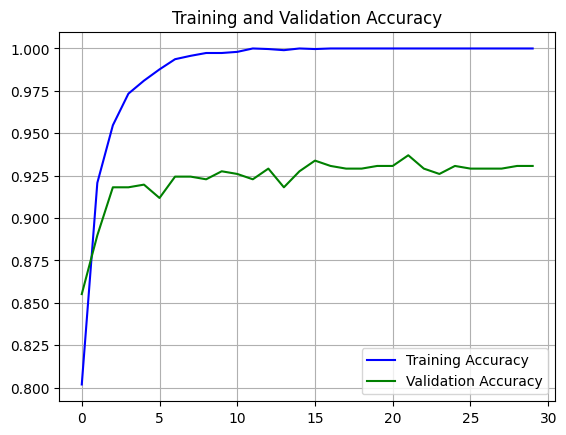

<Figure size 640x480 with 0 Axes>

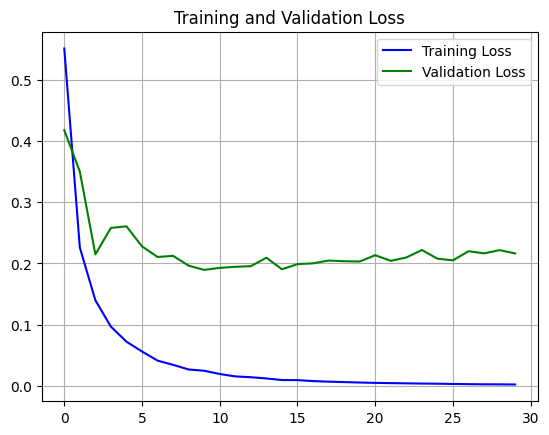

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


<ipython-input-30-1bdf1cd647ce>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


546/546 [==============================] - 8s 11ms/step
No of errors = 52/546


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

90.47619047619048

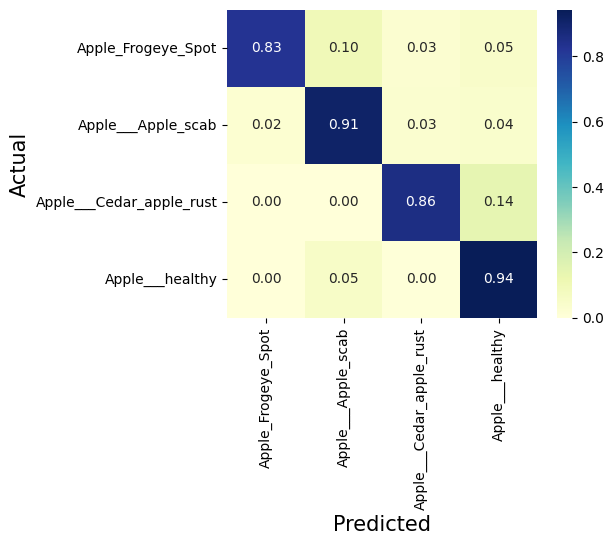

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

#**ResNet**

In [ ]:
from keras import applications

## Loading VGG16 model
base_model = applications.ResNet50(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
# dense_layer_1 = layers.Dense(63, activation='relu')
# dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    # dense_layer_2,
    prediction_layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
187/187 [==============================] - 17s 57ms/step - loss: 1.2525 - acc: 0.4677 - val_loss: 1.1812 - val_acc: 0.5181
Epoch 2/30
187/187 [==============================] - 9s 47ms/step - loss: 1.2252 - acc: 0.4677 - val_loss: 1.1627 - val_acc: 0.5181
Epoch 3/30
187/187 [==============================] - 8s 43ms/step - loss: 1.2045 - acc: 0.4674 - val_loss: 1.1404 - val_acc: 0.5197
Epoch 4/30
187/187 [==============================] - 8s 43ms/step - loss: 1.1871 - acc: 0.4684 - val_loss: 1.1631 - val_acc: 0.5386
Epoch 5/30
187/187 [==============================] - 9s 47ms/step - loss: 1.1721 - acc: 0.4707 - val_loss: 1.1042 - val_acc: 0.5197
Epoch 6/30
187/187 [==============================] - 9s 45ms/step - loss: 1.1550 - acc: 0.4780 - val_loss: 1.1075 - val_acc: 0.5370
Epoch 7/30
187/187 [==============================] - 9s 50ms/step - loss: 1.1413 - acc: 0.4820 - val_loss: 1.0746 - val_acc: 0.5386
Epoch 8/30
187/187 [==============================] - 8s 44ms/step -

In [ ]:
model.save("ResNet_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

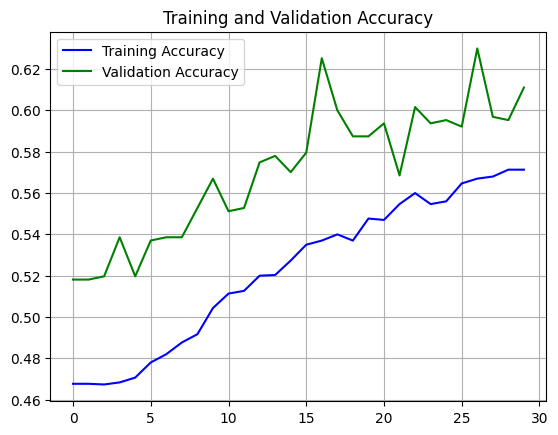

<Figure size 640x480 with 0 Axes>

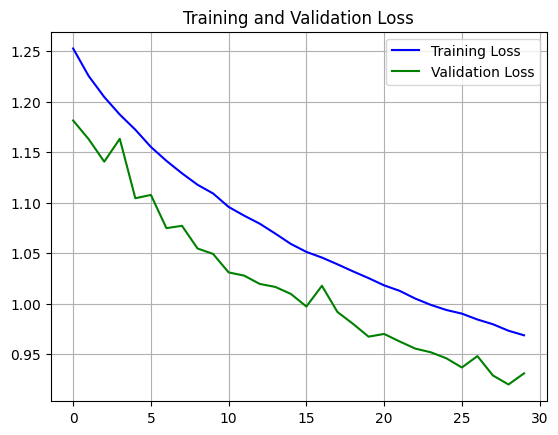

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Get the filenames from the generator
fnames = test_generator.filenames

# Get the ground truth from generator
ground_truth = test_generator.classes

# Get the label to class mapping from the generator
label2index = test_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


<ipython-input-9-1bdf1cd647ce>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


546/546 [==============================] - 6s 9ms/step
No of errors = 238/546


In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

56.41025641025641

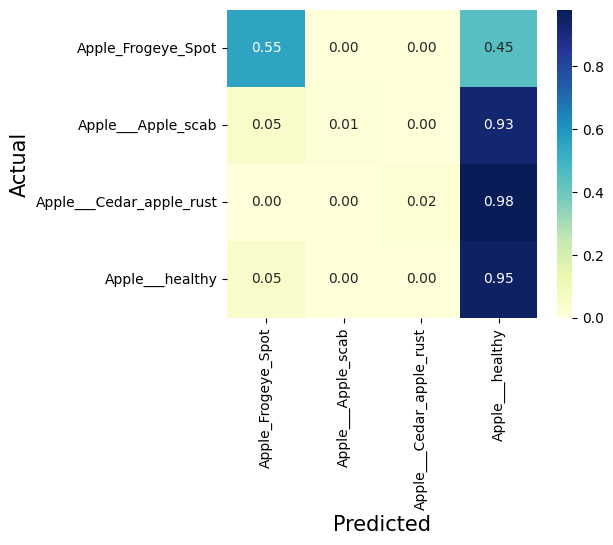

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.75      0.55      0.64       103
      Apple___Apple_scab       1.00      0.01      0.03       134
Apple___Cedar_apple_rust       1.00      0.02      0.04        49
         Apple___healthy       0.53      0.95      0.68       260

                accuracy                           0.56       546
               macro avg       0.82      0.39      0.35       546
            weighted avg       0.73      0.56      0.46       546



# **Functional Model**

In [ ]:
vgg_model = VGG16(include_top=False, input_shape=(64, 64, 3))

for layer in vgg_model.layers:
    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(4, activation='sigmoid')(class1)

model = Model(inputs = vgg_model.inputs, outputs = output)

In [ ]:
# data_path='C:\\Users\\HP\\Pictures\\AYESHI\\H_DATA'
# data_dir_list = os.listdir(data_path)
# img_data_list=[]
# labels = []

# for dataset in data_dir_list:
#     img_list=os.listdir(data_path+'\\'+ dataset)
#     print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
#     for img in img_list:
#         input_img=cv2.imread(data_path + '\\'+ dataset + '\\'+ img )
# #         input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
#         labels.append(dataset)
#         input_img_resize=cv2.resize(input_img,(224,224))
#         img_data_list.append(input_img_resize)

# label=np.array(labels)
# img_data = np.array(img_data_list)
# img_data = img_data.astype('float32')
# img_data = img_data/255
# img_data.shape